In [1]:
import pandas as pd
df = pd.read_csv('test.csv')
df['label'] = df['1']
df['text'] = df['This model may be ok for sedentary types, but I\'m active and get around alot in my job - consistently found these stockings rolled up down by my ankles! Not Good!! Solution: go with the standard compression stocking, 20-30, stock #114622. Excellent support, stays up and gives me what I need. Both pair of these also tore as I struggled to pull them up all the time. Good riddance/bad investment!']
df = df.drop(['1','mens ultrasheer', 'This model may be ok for sedentary types, but I\'m active and get around alot in my job - consistently found these stockings rolled up down by my ankles! Not Good!! Solution: go with the standard compression stocking, 20-30, stock #114622. Excellent support, stays up and gives me what I need. Both pair of these also tore as I struggled to pull them up all the time. Good riddance/bad investment!'], axis = 1)
df = df[0:10000]

In [2]:
import re
import string
import spacy

import nltk
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stopwordf = nltk.corpus.stopwords.words('english')

tokenizer = spacy.load("en_core_web_sm")

def preprocess_text(text):
    text = text.lower()  
    text = re.sub(r'\d+', '', text)  
    text = text.translate(str.maketrans('', '', string.punctuation))  
    return text

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000 
max_length = 100    

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])

sequences = tokenizer.texts_to_sequences(df['text'])

padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Art\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Art\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Art\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_length))  
model.add(LSTM(64, return_sequences=True))  
model.add(LSTM(32))                      
model.add(Dense(1, activation='sigmoid'))  

model.compile(loss='binary_crossentropy', 
              optimizer=Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 100, 64)           49408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1,341,857
Trainable params: 1,341,857
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(padded_sequences, df['label'], epochs=15, validation_split=0.2)

Epoch 1/15
250/250 [==============================] - 48s 174ms/step - loss: -20.0452 - accuracy: 0.1996 - val_loss: -30.7446 - val_accuracy: 0.1800
Epoch 2/15
250/250 [==============================] - 42s 170ms/step - loss: -37.7608 - accuracy: 0.2004 - val_loss: -47.3021 - val_accuracy: 0.1800
Epoch 3/15
250/250 [==============================] - 44s 177ms/step - loss: -54.2867 - accuracy: 0.2004 - val_loss: -64.6470 - val_accuracy: 0.1800
Epoch 4/15
250/250 [==============================] - 43s 171ms/step - loss: -70.7344 - accuracy: 0.2004 - val_loss: -81.4521 - val_accuracy: 0.1800
Epoch 5/15
250/250 [==============================] - 45s 179ms/step - loss: -86.9184 - accuracy: 0.2004 - val_loss: -98.1010 - val_accuracy: 0.1800
Epoch 6/15
250/250 [==============================] - 44s 174ms/step - loss: -102.9889 - accuracy: 0.2004 - val_loss: -114.6783 - val_accuracy: 0.1800
Epoch 7/15
250/250 [==============================] - 41s 166ms/step - loss: -119.0149 - accuracy: 0.200

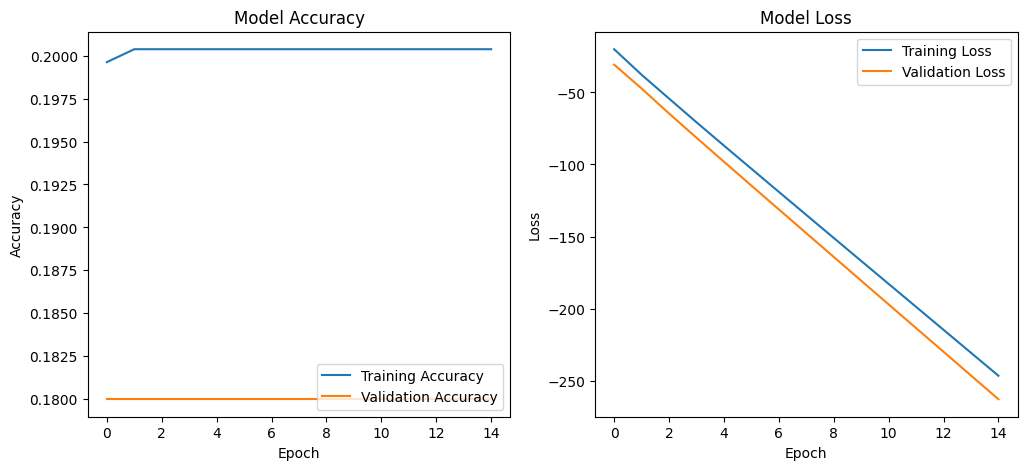

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()